# Prediction of USD/JPY Exchange Rate using Random Forest Classifer

## Preprocessing

In [33]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

from matplotlib.ticker import MaxNLocator

In [34]:
# Loading dataset

data= yf.download("USDJPY=X", start="2002-01-01", end="2022-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-01,131.669998,132.000000,131.240005,131.929993,131.929993,0
2002-01-02,131.940002,132.270004,131.240005,132.139999,132.139999,0
2002-01-03,132.139999,132.149994,131.320007,131.699997,131.699997,0
2002-01-04,131.710007,131.720001,130.639999,131.020004,131.020004,0
2002-01-07,130.699997,131.600006,130.360001,131.250000,131.250000,0


In [35]:
# Checking data information

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5450 entries, 2002-01-01 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5450 non-null   float64
 1   High       5450 non-null   float64
 2   Low        5450 non-null   float64
 3   Close      5450 non-null   float64
 4   Adj Close  5450 non-null   float64
 5   Volume     5450 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 298.0 KB


In [36]:
# Checking Index information

type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Data Visualization

In [37]:
# Adding Day and Month columns

data['DayOfWeek'] = data.index.dayofweek
data['Month'] = data.index.month
data.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month
Date,,,,,,,,
2002-01-01,131.669998,132.000000,131.240005,131.929993,131.929993,0,1,1
2002-01-02,131.940002,132.270004,131.240005,132.139999,132.139999,0,2,1
2002-01-03,132.139999,132.149994,131.320007,131.699997,131.699997,0,3,1
2002-01-04,131.710007,131.720001,130.639999,131.020004,131.020004,0,4,1
2002-01-07,130.699997,131.600006,130.360001,131.250000,131.250000,0,0,1


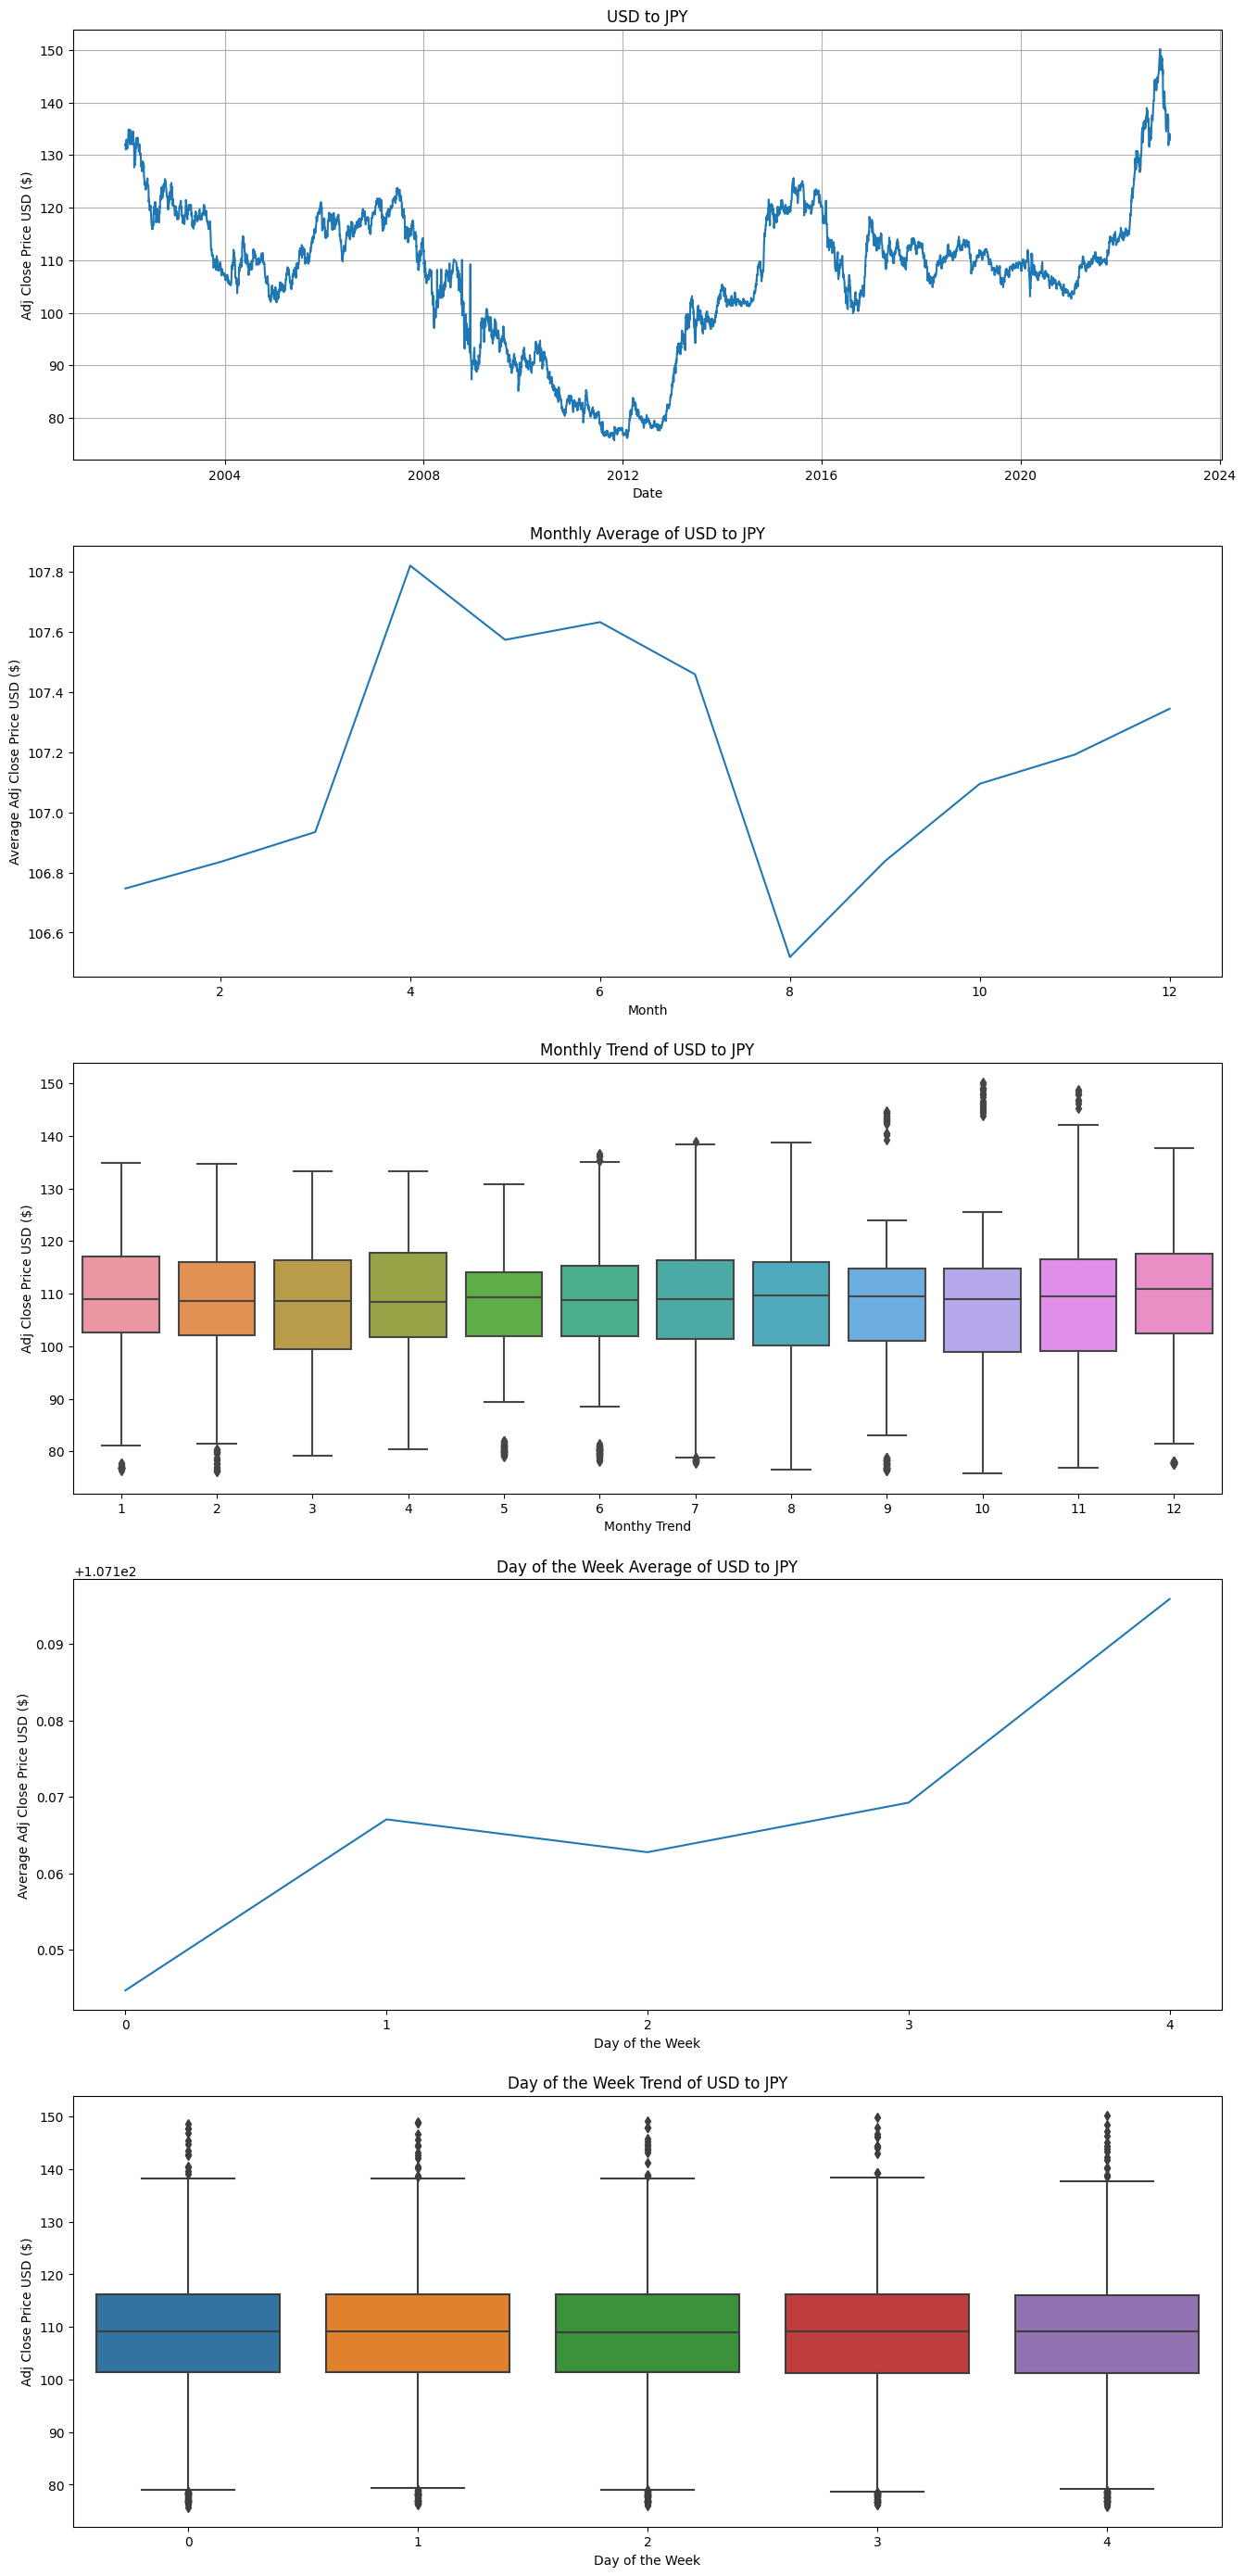

In [38]:
# Data Visualization

fig, ax = plt.subplots(5,1, figsize=(16, 35))

# Line Plot of Adjusted Close against Date
ax[0].plot(data['Adj Close'])
ax[0].grid(True)
ax[0].set_title('USD to JPY')
ax[0].set_ylabel('Adj Close Price USD ($)')
ax[0].set_xlabel('Date')


# Grouping by Month and adding the average of Adjusted Close
data.groupby('Month')['Adj Close'].mean().plot(kind='line', ax=ax[1])
ax[1].set_title('Monthly Average of USD to JPY')
ax[1].set_ylabel('Average Adj Close Price USD ($)')
ax[1].set_xlabel('Month')

# Box Plot of Monthly trend of Adjusted Close
sns.boxplot(x=data['Month'], y=data['Adj Close'], ax=ax[2])
ax[2].set_title('Monthly Trend of USD to JPY')
ax[2].set_ylabel('Adj Close Price USD ($)')
ax[2].set_xlabel('Monthy Trend')


# Grouping by Day of the Week and adding the average of Adjusted Close
data.groupby('DayOfWeek')['Adj Close'].mean().plot(kind='line', ax=ax[3])
ax[3].set_title('Day of the Week Average of USD to JPY')
ax[3].set_ylabel('Average Adj Close Price USD ($)')
ax[3].set_xlabel('Day of the Week')
ax[3].xaxis.set_major_locator(MaxNLocator(integer=True))


# Box Plot of Day of the Week trend of Adjusted Close
sns.boxplot(x=data['DayOfWeek'], y=data['Adj Close'], ax=ax[4])
ax[4].set_title('Day of the Week Trend of USD to JPY')
ax[4].set_ylabel('Adj Close Price USD ($)')
ax[4].set_xlabel('Day of the Week')




plt.show()

## Target & Features

In [39]:
# Setting Target Column

# Creating a new column 'Tomorrow', with tomorrow's price
data['Tomorrow'] = data['Adj Close'].shift(-1)

# Creating a new column 'Target', with 1 if Tomorrow's price is higher than today's price, otherwise 0
data['Target'] = (data['Tomorrow']>data['Adj Close']).astype(int)

data.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Tomorrow,Target
Date,,,,,,,,,,
2002-01-01,131.669998,132.000000,131.240005,131.929993,131.929993,0,1,1,132.139999,1
2002-01-02,131.940002,132.270004,131.240005,132.139999,132.139999,0,2,1,131.699997,0
2002-01-03,132.139999,132.149994,131.320007,131.699997,131.699997,0,3,1,131.020004,0
2002-01-04,131.710007,131.720001,130.639999,131.020004,131.020004,0,4,1,131.250000,1
2002-01-07,130.699997,131.600006,130.360001,131.250000,131.250000,0,0,1,132.919998,1


In [40]:
# Setting Features

features = ['Open', 'High', 'Low', 'Adj Close', 'Month', 'DayOfWeek']

## Train Test Split

In [41]:
# Spliting Train and Test Data

train = data.iloc[:-250]
test = data.iloc[-250:]

print(train.shape, test.shape)


(5200, 10) (250, 10)


## Random Forest Classifier

In [42]:
# Importing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [43]:
# Iinitializing Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)

# Fitting Model
model.fit(train[features], train['Target'])

RandomForestClassifier(min_samples_split=10, random_state=1)

### Measuring Precision Score

In [44]:
# Measuring Precision Score

from sklearn.metrics import precision_score

preds = model.predict(test[features])

# Changing to Pandas Series
preds = pd.Series(preds, index=test.index)


precision_score(test['Target'], preds)

print(f"Precision Score: {precision_score(test['Target'], preds)}")

Precision Score: 0.675


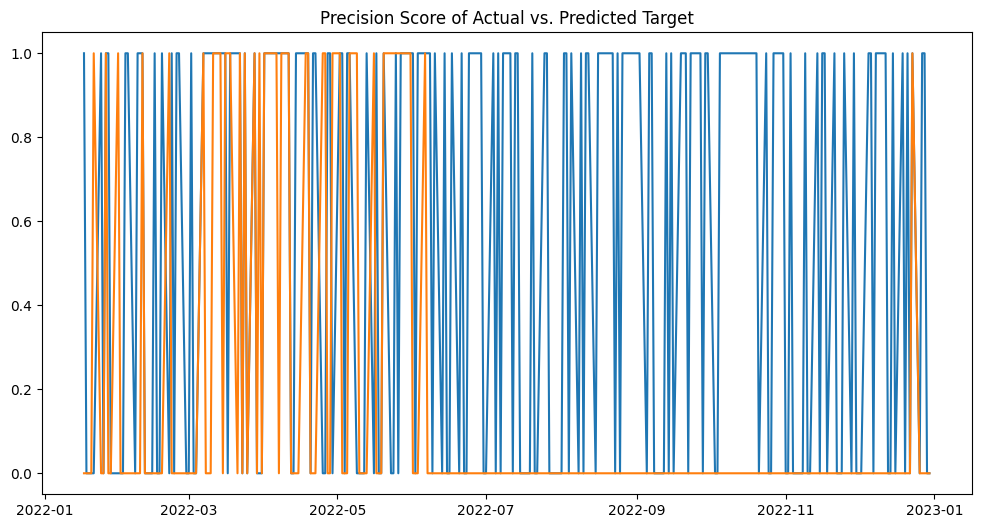

In [45]:
# Ploting Precision Score

combined = pd.concat([test['Target'], preds], axis=1)

plt.figure(figsize=(12,6))
plt.plot(combined)
plt.title('Precision Score of Actual vs. Predicted Target')
plt.show()

## Back Testing

In [46]:
# Creating Prediction function

def predict(train, test, features, model):
    model.fit(train[features], train['Target'])
    preds = model.predict(test[features])
    preds = pd.Series(preds, index =test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [47]:
# Creating backtest function

def backtest(data, model,  features, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        predictions = predict(train, test, features, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [48]:
# back test

predictions = backtest(data, model, features)

In [49]:
# Evaluating Errors of predictions

predictions['Predictions'].value_counts()

0    1611
1    1339
Name: Predictions, dtype: int64

In [50]:
# Precision Score

precision_score(predictions['Target'], predictions['Predictions'])

print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")

Precision Score: 0.6056758775205378


In [51]:
# % Of Correct Predictions

predictions['Target'].value_counts()/predictions.shape[0]

1    0.521017
0    0.478983
Name: Target, dtype: float64

## Adding Predictors to Model

In [52]:
# Addition predictors

horizons = [2,5,60,250,500]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_{horizon}'
    data[ratio_column] = data['Adj Close'] / rolling_averages['Adj Close']

    new_predictors.append(ratio_column)

    trend_column = f'Trend_{horizon}'
    data[trend_column] = data['Adj Close'] - rolling_averages['Adj Close']

    new_predictors += [ratio_column, trend_column]

In [53]:
data

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_500,Trend_500
Date,,,,,,,,,,,,,,,,,,,,
2002-01-01,131.669998,132.000000,131.240005,131.929993,131.929993,0,1,1,132.139999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02,131.940002,132.270004,131.240005,132.139999,132.139999,0,2,1,131.699997,0,1.000795,0.105003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-03,132.139999,132.149994,131.320007,131.699997,131.699997,0,3,1,131.020004,0,0.998332,-0.220001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-04,131.710007,131.720001,130.639999,131.020004,131.020004,0,4,1,131.250000,1,0.997412,-0.339996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-07,130.699997,131.600006,130.360001,131.250000,131.250000,0,0,1,132.919998,1,1.000877,0.114998,0.997280,-0.357999,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,132.770004,133.237000,132.330002,132.789993,132.789993,0,0,12,132.764008,0,1.001633,0.216499,0.996318,-0.490802,0.935576,-9.143889,1.007210,0.950538,1.096395,11.674854
2022-12-27,132.764008,133.587006,132.647995,132.764008,132.764008,0,1,12,133.485992,1,0.999902,-0.012993,1.002487,0.329410,0.936686,-8.973958,1.006479,0.854608,1.095655,11.590860
2022-12-28,133.485992,134.395004,133.410995,133.485992,133.485992,0,2,12,134.033997,1,1.002712,0.360992,1.005518,0.732596,0.942922,-8.080290,1.011395,1.503973,1.101071,12.253079


In [54]:
# Removing NaN values

data = data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_500,Trend_500
Date,,,,,,,,,,,,,,,,,,,,
2003-12-01,109.830002,109.989998,109.050003,109.169998,109.169998,0,0,12,108.730003,0,0.997943,-0.225002,0.998774,-0.134003,0.986581,-1.484836,0.934913,-7.600242,0.901626,-11.911182
2003-12-02,109.180000,109.779999,108.480003,108.730003,108.730003,0,1,12,108.300003,0,0.997981,-0.219997,0.995970,-0.439998,0.983802,-1.790164,0.931556,-7.988677,0.898337,-12.304777
2003-12-03,108.730003,108.790001,108.040001,108.300003,108.300003,0,2,12,108.269997,0,0.998019,-0.215000,0.993396,-0.719998,0.981209,-2.073997,0.928266,-8.369117,0.895137,-12.687097
2003-12-04,108.300003,108.459999,107.900002,108.269997,108.269997,0,3,12,107.620003,0,0.999861,-0.015003,0.994964,-0.548004,0.982244,-1.957170,0.928399,-8.350083,0.895236,-12.670243
2003-12-05,108.250000,108.419998,107.489998,107.620003,107.620003,0,4,12,107.410004,0,0.996989,-0.324997,0.992640,-0.797998,0.977774,-2.446331,0.923229,-8.949117,0.890205,-13.273437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,132.356995,133.121002,132.291000,132.356995,132.356995,0,4,12,132.789993,1,0.999951,-0.006500,0.987291,-1.703802,0.931211,-9.777321,1.004449,0.586227,1.093343,11.299881
2022-12-26,132.770004,133.237000,132.330002,132.789993,132.789993,0,0,12,132.764008,0,1.001633,0.216499,0.996318,-0.490802,0.935576,-9.143889,1.007210,0.950538,1.096395,11.674854
2022-12-27,132.764008,133.587006,132.647995,132.764008,132.764008,0,1,12,133.485992,1,0.999902,-0.012993,1.002487,0.329410,0.936686,-8.973958,1.006479,0.854608,1.095655,11.590860


## Grid Search

In [55]:
# Importing Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [56]:
# Initializing Model
rf = RandomForestClassifier(random_state=1)

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 10, 30],
    'min_samples_split': [10, 30, 50]
}

# Setting up grid search with precision score
gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1,
                  verbose=1)

# Fitting grid search
gs.fit(data[new_predictors], data['Target'])

print(f'Best Score: {gs.best_score_}')
print(f'Best parameters: {gs.best_params_}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


Best Score: 0.5180951325864668
Best parameters: {'max_depth': 3, 'min_samples_split': 30, 'n_estimators': 200}


## Improving Model

In [57]:
# Updating Model to include new predictors

model = RandomForestClassifier(n_estimators=200, min_samples_split=30, max_depth=3, random_state=1)


In [58]:
# Redefing predit function to increase threshold

def predict(train, test, features, model):
    model.fit(train[features], train['Target'])
    preds = model.predict_proba(test[features])[:,1]

    # putting threshold as 60%
    preds[preds>=.6] = 1
    preds[preds<.6] = 0

    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)

    return combined

In [59]:
# Run backtest

predictions = backtest(data, model, new_predictors)
predictions['Predictions'].value_counts()

0.0    2386
1.0      64
Name: Predictions, dtype: int64

In [60]:
# Precision Score

precision_score(predictions['Target'], predictions['Predictions'])

print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")

Precision Score: 0.625
